# Boston Dataset Model with Linear Regression

In [34]:
# Importing libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [35]:
# Loading the dataset and dividing in X and y variables
boston = datasets.load_boston()
X = boston.data
y = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [36]:
X.shape, y.shape

((506, 13), (506,))

## First Linear Regression Model

In [37]:
# Loading dataset in pandas dataframe
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
# Splitting the dataset in training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [40]:
# Fit the model
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lm.predict(X_test)

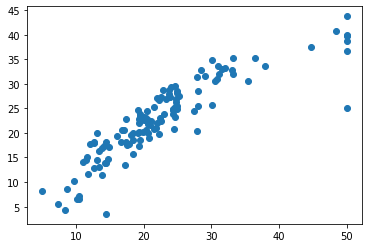

In [42]:
# Visualising  the  model
plt.scatter(y_test, y_pred)
plt.show()

#### Accuracy of model

In [43]:
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)
print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.7226769486252719
Testing Score: 0.7817179849649413


#### Error of model

In [44]:
# Importing metrics
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.0771365303621354
MSE: 19.549029514476988
RMSE: 4.421428447286803


## Improving our model

In [46]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
dtemp = pd.DataFrame(y)
dtemp.columns = ["Y"]
dtemp.head()

,Y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [48]:
temp = df.copy()
temp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [49]:
temp["Y"] = dtemp

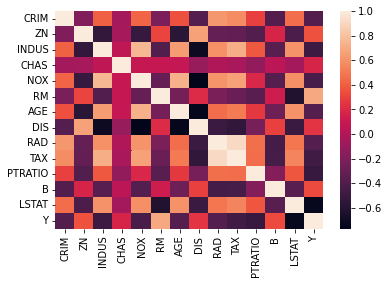

In [50]:
# Finding the relation between dataset
sns.heatmap(temp.corr())

In [51]:
temp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
RM_RM = df["RM"]**2
RM_RM

0      43.230625
1      41.229241
2      51.624225
3      48.972004
4      51.079609
         ...    
501    43.467649
502    37.454400
503    48.664576
504    46.158436
505    36.360900
Name: RM, Length: 506, dtype: float64

In [53]:
B_B = df["B"]**2
B_B

0      157529.6100
1      157529.6100
2      154315.4089
3      155732.8369
4      157529.6100
          ...     
501    153656.1601
502    157529.6100
503    157529.6100
504    154802.9025
505    157529.6100
Name: B, Length: 506, dtype: float64

In [54]:
df["X_X"] = RM_RM
df["B_B"] = B_B

In [55]:
# New  dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,X_X,B_B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,43.230625,157529.6100
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,41.229241,157529.6100
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,51.624225,154315.4089
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,48.972004,155732.8369
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,51.079609,157529.6100


In [56]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'X_X', 'B_B'],
      dtype='object')

In [57]:
X2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'X_X', 'B_B']]


In [58]:
# Spliting the model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((379, 15), (127, 15), (379,), (127,))

In [59]:
# Fit the model
lm.fit(X2_train, y2_train)

LinearRegression()

In [60]:
y2_pred = lm.predict(X2_test)

In [61]:
# Checking the intercept and coefficients
intercept = lm.intercept_
coef = lm.coef_
print(f"Intercept of model: {intercept}")
print(f"Coefficients of model: {coef}")

Intercept of model: 116.74564513578893
Coefficients of model: [-1.13629512e-01  2.93288020e-02  2.38612212e-02  2.10761673e+00
 -1.78268668e+01 -2.36883705e+01 -8.11927456e-03 -1.20053521e+00
  2.33465708e-01 -1.10443141e-02 -6.91659117e-01  2.44619299e-02
 -5.07908003e-01  2.18048660e+00 -3.81592825e-05]


In [62]:
coeff_df = pd.DataFrame(data=coef, index=X2.columns)
coeff_df.columns = ["Coefficient"]
coeff_df

,Coefficient
CRIM,-0.113630
ZN,0.029329
INDUS,0.023861
CHAS,2.107617
NOX,-17.826867
RM,-23.688370
AGE,-0.008119
DIS,-1.200535
RAD,0.233466
TAX,-0.011044


In [63]:
# Error in model
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE: 2.8390056955856124
MSE: 19.103341631574615
RMSE: 4.370736966642424


In [64]:
# Accuracy of model
train_score = lm.score(X2_train, y2_train)
test_score = lm.score(X2_test, y2_test)
print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.8185261511111306
Testing Score: 0.7423242465805768


#### Visualing our model and  comparing it with old model

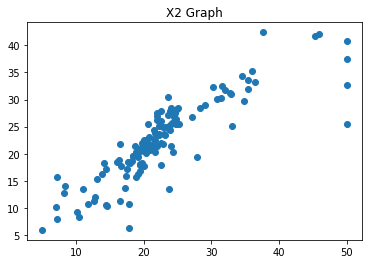

In [65]:
plt.scatter(y2_test, y2_pred)
plt.title("X2 Graph")
plt.show()

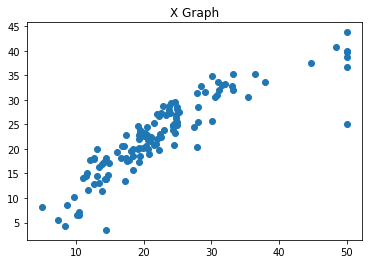

In [66]:
plt.scatter(y_test, y_pred)
plt.title("X Graph")
plt.show()